In [83]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [84]:
model = keras.models.load_model('exportedModels') # 'exportedModels' is a folder not a file. Keras takes care of everything. 

In [93]:
## Boilerplate code to get an imge from a folder. 
def read_image(path):
    img = load_img(path, target_size = (224, 224)) # Load the image. 
    img_arr = img_to_array(img) # Turn the image into an array. 
    ## IMPORTANT
    ## Since the model is trained on batches, the model expects an input of (Batch_size,224,224,3), but the image is different.
    ## It has a a size of (224,224,3)
    ## In order to fix this, we just expand the dimensions of the image array to make it (1,224,224,3).
    ## The 1 is there because we are only predicting one image. 
    img_arr = np.expand_dims(img_arr, axis = 0)
    img_arr /= 255 # Important to rescale the immage, otherwise the prediction will be wrong. 
    return img_arr

testImage = read_image('./FRUIT-16K-PREPROCESSED/test/F_Banana/199.jpg')

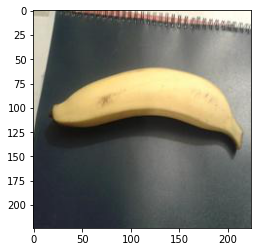

Final shape before input into model: (1, 224, 224, 3)


In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(testImage[0])
plt.show()
print("Final shape before input into model:", testImage.shape)

In [98]:
## For now the possible classes should be hard coded. This is because the classes in the model are encoded. 
CLASSES = ['F_Banana', 'F_Lemon', 'F_Lulo', 'F_Mango', 'F_Orange', 'F_Strawberry', 'F_Tamarillo', 'F_Tomato', 'S_Banana', 'S_Lemon', 'S_Lulo', 'S_Mango', 'S_Orange', 'S_Strawberry', 'S_Tamarillo', 'S_Tomato']

In [99]:
prediction = model.predict(testImage) # Making the actual prediction. 
print(prediction) # The model simply returns a list of propabilities for what the object could be. 
print("\nPrediction: ",(CLASSES[np.argmax(prediction)])) # We want the higest probability. Use that to index into the CLASSES. 

[[9.9999499e-01 2.5513742e-24 0.0000000e+00 1.0618696e-14 1.0592184e-24
  6.3305609e-38 0.0000000e+00 0.0000000e+00 4.9699997e-06 5.1792147e-20
  4.3345945e-22 6.1674199e-09 3.9734155e-15 2.7894125e-17 3.0279885e-28
  9.9020971e-22]]

Prediction:  F_Banana
